# Connecting to Spotipy

Below is some starter code for working with Spotipy. The Client ID and Client Secret are unique to our project and are also linked to my personal spotify account so PLEASE use discretion with those things. More specifically, please put them in a separate file on your computer, and DO NOT include that file or the client id and client secret when you push your code to GitHub. Other than that, lets have fun y'all!

In [10]:
from nltk import FreqDist #Importing natural language toolkit (nltk) to create word frequency distribution
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import spotipy
import pprint
import pandas as pd
import requests 
import numpy as np 

client_id = "61fc722b270143c39a95b0d83113b103"
client_secret = "a1b6d905ef364a4b9bd662f136c0892f"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
                                                      client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

result = sp.search(q='id:', type='artist')
pprint.pprint(result)

{'artists': {'href': 'https://api.spotify.com/v1/search?query=id%3A&type=artist&offset=0&limit=10',
             'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/26oVoq5QZzsm9MGhOyT2tv'},
                        'followers': {'href': None, 'total': 46},
                        'genres': [],
                        'href': 'https://api.spotify.com/v1/artists/26oVoq5QZzsm9MGhOyT2tv',
                        'id': '26oVoq5QZzsm9MGhOyT2tv',
                        'images': [{'height': 640,
                                    'url': 'https://i.scdn.co/image/9d1919223aeaa5dacfc9aedebad1b8a7b4211f7c',
                                    'width': 640},
                                   {'height': 300,
                                    'url': 'https://i.scdn.co/image/b38e3f5cc9924271f8b9e9d2b074773528d577d9',
                                    'width': 300},
                                   {'height': 64,
                                    'url': 'https://i.scdn.

In [11]:
# https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2015 
# top 100 of 2015 through wikipedia billboard
top_100_2015 = pd.read_csv("top_100_2015.csv")
top_100_2015.head()

,№,Title,Artist(s)
0,1,"""Uptown Funk""",Mark Ronson featuring Bruno Mars
1,2,"""Thinking Out Loud""",Ed Sheeran
2,3,"""See You Again""",Wiz Khalifa featuring Charlie Puth
3,4,"""Trap Queen""",Fetty Wap
4,5,"""Sugar""",Maroon 5


In [12]:
songs = []
genres = []
for song in range(0,100):
    
    #I put this in a try just in case the search result yields an error..or any api request yields an error
    try:
        # I search the song name and artist using spotipy, then I limit the number of search results to 1
         track = sp.search(top_100_2015['Title'][song] + ' ' + top_100_2015['Artist(s)'][song],limit=1)
            
            # Here I am parsing the json return to get the artists' id so I can look up the artist
         track_id = track['tracks']['items'][0]['artists'][0]['id']
        # This gets the artists' spotify profile, which includes the genres reflected in their music
         artist = sp.artist(track_id)
         genres.append(artist['genres'])
    except:
        genres.append('n/a')

In [13]:
top_100_2015['genre'] = genres
top_100_2015

,№,Title,Artist(s),genre
0,1,"""Uptown Funk""",Mark Ronson featuring Bruno Mars,n/a
1,2,"""Thinking Out Loud""",Ed Sheeran,[pop]
2,3,"""See You Again""",Wiz Khalifa featuring Charlie Puth,[]
3,4,"""Trap Queen""",Fetty Wap,"[pop, pop rap, rap, southern hip hop, trap music]"
4,5,"""Sugar""",Maroon 5,[pop]
5,6,"""Shut Up and Dance""",Walk the Moon,"[indie pop, indie poptimism, indietronica, mod..."
6,7,"""Blank Space""",Taylor Swift,"[dance pop, pop, post-teen pop]"
7,8,"""Watch Me""",Silentó,[pinoy hip hop]
8,9,"""Earned It""",The Weeknd,"[canadian pop, pop, rap]"
9,10,"""The Hills""",The Weeknd,"[canadian pop, pop, rap]"


In [14]:
allGenres = []
for gen in top_100_2015['genre']:
    if gen != 'n/a':
        for b in gen:
            allGenres.append(b)
len(allGenres)


246

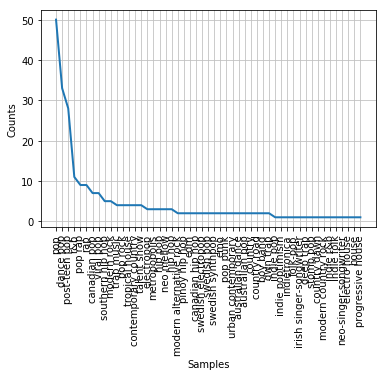

In [59]:
#I use FreqDist to automatically count the number of times a certain word, in this case genre, appears in the list
genreDist = FreqDist(allGenres)

#This is a plot of the frequency distribution. I believe there is much work to be done in terms of visualization
# but I believe this is a start
# genreDist
genreDist.plot()

In [27]:
df = pd.DataFrame.from_dict(genreDist, orient='index')

genres = df.rename_axis('Genres').reset_index()\
 .assign(length = df.index.str.len()).rename(columns={0:'Genre Count'})

del genres["length"]
genres


# sort the values by largest to smallest
genres.sort_values(by="Genre Count", ascending=False)
genres.set_index("Genres")

,Genre Count
Genres,
pop,50
pop rap,9
rap,9
southern hip hop,5
trap music,4
indie pop,1
indie poptimism,1
indietronica,1
modern alternative rock,2


In [72]:
df = pd.DataFrame.from_dict(genreDist, orient='index')
genre_count = df.rename_axis('Genres').reset_index().rename(columns={0:'Count'})

In [75]:

genre_count = genre_count.sort_values(by="Count", ascending=False)
genre_count.head()

,Genres,Count
0,pop,50
11,dance pop,33
12,post-teen pop,28
18,r&b,11
2,rap,9


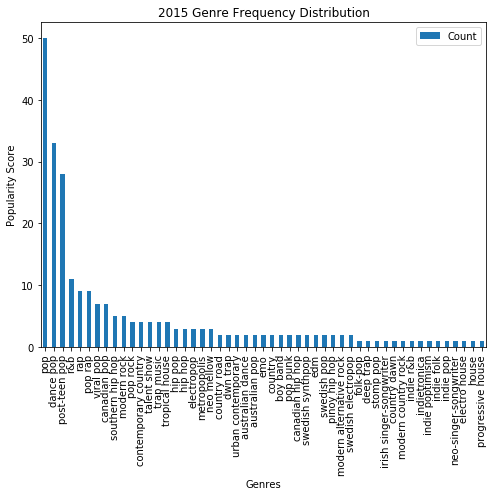

In [76]:
genre_count = genre_count.set_index('Genres')
genre_count.plot(kind='bar', figsize=(7,7), )

genre_count = genre_count.reset_index()
plt.title('2015 Genre Frequency Distribution')
plt.xlabel('Genres')
plt.ylabel('Popularity Score')
plt.tight_layout()
plt.savefig("freqDist2015.png")

In [29]:
popCount = 0
rapCount = 0
edmCount = 0
misCount = 0
for genre in allGenres:
   if 'pop' in genre:
       popCount = popCount + 1
   elif('rap' or 'hip hop' or 'trap') in genre:
       rapCount = rapCount + 1
   elif('edm' or 'electro' or 'techno') in genre:
       edmCount = edmCount + 1
   else:
       misCount = misCount + 1

condensedGenre = ['Pop','Rap/Hip-Hop','EDM','Misc.']
summarizedGenres = pd.DataFrame({"Genre":condensedGenre, "Count":[popCount,rapCount,edmCount,misCount]})

summarizedGenres = summarizedGenres.set_index("Genre")
summarizedGenres

,Count
Genre,
Pop,161
Rap/Hip-Hop,16
EDM,2
Misc.,67


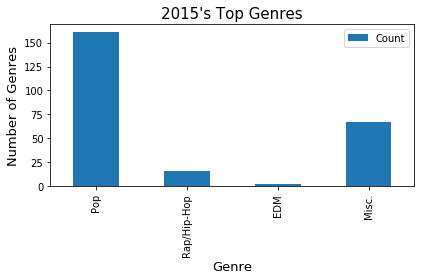

In [57]:
summarizedGenres.plot(kind='bar')
plt.xlabel("Genre", fontsize=13)
plt.ylabel("Number of Genres", fontsize=13)
plt.title("2015's Top Genres", fontsize=15)
plt.tight_layout()
plt.savefig("2015's Top Genres.png")

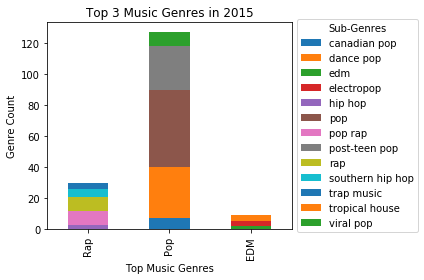

In [51]:
sum = [['Pop','pop', 50],
        ['Pop','dance pop', 33],
        ['Pop','post-teen pop', 28],
        ['Pop','canadian pop', 7],
        ['Pop','viral pop', 9],
        ['Rap','rap', 9],
        ['Rap','pop rap', 9],
        ['Rap','hip hop', 3],
        ['Rap','trap music', 4],
        ['Rap','southern hip hop', 5],
        ['EDM','electropop', 3],
        ['EDM','edm', 2],
        ['EDM','tropical house', 4]]
         
data = pd.DataFrame(sum,
        columns=['Top Music Genres', 'Sub-Genres', 'value'])         
data = data.set_index(['Top Music Genres', 'Sub-Genres']).value

data.unstack().sort_index(ascending=False).plot(kind='bar', stacked=True)
plt.title("Top 3 Music Genres in 2015")
plt.legend(title="Sub-Genres",loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Genre Count")
# data.sort_index(ascending=False)
plt.tight_layout()
plt.savefig("stackedbar2015.png")